# Week2_授業前課題_ダミーデータの作成

## 【問題1】乱数の作成

平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


\begin{bmatrix}
1.0 & 0.8 \\
0.8 & 1.0
\end{bmatrix}

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。

> numpy.random.multivariate_normal — NumPy v1.16 Manual

作成したndarrayのshapeは(500, 2)になります。


《シード値について》

実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

    np.random.seed(0)

In [1]:
import numpy as np
np.random.seed(0)
mean = np.array([-3, 0])
cov = np.array([[1.0, 0.8], [0.8, 1.0]])
random_num = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
random_num.shape

(500, 2)

## 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。

散布図はmatplotlibのplt.scatter()を使うことで描けます。

> matplotlib.pyplot.scatter — Matplotlib 3.1.1 documentation

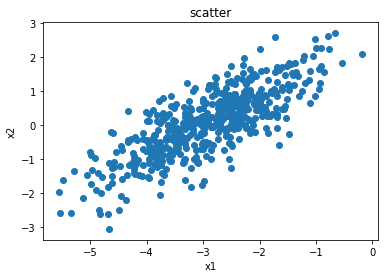

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
x1 = random_num[:, 0]
x2 = random_num[:, 1]
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scatter')
plt.scatter(x1, x2);

## 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。

ヒストグラムはplt.hist()を使うことで描けます。

> matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation

各次元ごとに作成し、2つのヒストグラムとしてください。

それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

> matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation

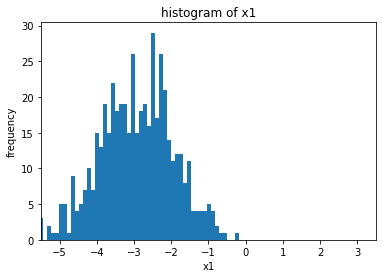

In [3]:
plt.hist(x1, bins=50);
plt.title('histogram of x1')
plt.xlabel('x1')
plt.ylabel('frequency')
plt.xlim(-5.5, 3.5);

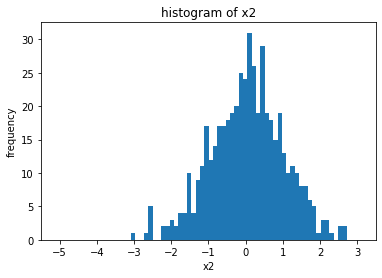

In [4]:
plt.hist(x2, bins=50);
plt.title('histogram of x2')
plt.xlabel('x2')
plt.ylabel('frequency')
plt.xlim(-5.5, 3.5);

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


\begin{bmatrix}
1.0 & 0.8 \\
0.8 & 1.0
\end{bmatrix}

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。

In [5]:
mean2 = np.array([0, -3])
random_num2 = np.random.multivariate_normal(mean=mean2, cov=cov, size=500)
x1_2 = random_num2[:, 0]
x2_2 = random_num2[:, 1]

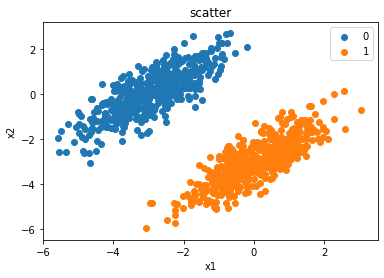

In [6]:
plt.scatter(x1, x2, label='0')
plt.scatter(x1_2, x2_2, label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scatter')
plt.legend();

## 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。

> numpy.concatenate — NumPy v1.16 Manual

> numpy.vsplit — NumPy v1.16 Manual

In [7]:
concat_random_num = np.concatenate((random_num, random_num2), axis=0)
concat_random_num.shape

(1000, 2)

## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

《作成例》

データが3個+3個の場合は以下のような(6, 3)のndarrayになります。

In [8]:
label = np.concatenate((np.zeros(500) ,np.ones(500))).reshape(-1,1)
random_num_with_label = np.concatenate((concat_random_num, label), axis=1)
random_num_with_label.shape

(1000, 3)